In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.2


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('UCI_Credit_Card.csv')
X = dataset.iloc[:, 1:24]
y = dataset.iloc[:, 24]

In [5]:
# independent feature
X.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BI

In [6]:
# Dependent feature
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Part 2 - Now let's make the ANN!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20,input_shape=(23,),activation='relu'))

In [12]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [13]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [14]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))


In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                480       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [16]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [17]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#tensorflow.keras.optimizers.rm

In [19]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [20]:
X_train.shape

(24000, 23)

In [21]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
2400/2400 [==============================] - 9s 3ms/step - loss: 0.4590 - accuracy: 0.8097 - val_loss: 0.4472 - val_accuracy: 0.7965
Epoch 2/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4505 - accuracy: 0.8144 - val_loss: 0.4563 - val_accuracy: 0.8258
Epoch 3/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4480 - accuracy: 0.8140 - val_loss: 0.4372 - val_accuracy: 0.8222
Epoch 4/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4448 - accuracy: 0.8150 - val_loss: 0.4383 - val_accuracy: 0.8242
Epoch 5/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4424 - accuracy: 0.8152 - val_loss: 0.4279 - val_accuracy: 0.8280
Epoch 6/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4423 - accuracy: 0.8156 - val_loss: 0.4349 - val_accuracy: 0.8278
Epoch 7/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4396 - accuracy: 0.8147 - val_loss: 0.4427 - val_ac

In [22]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


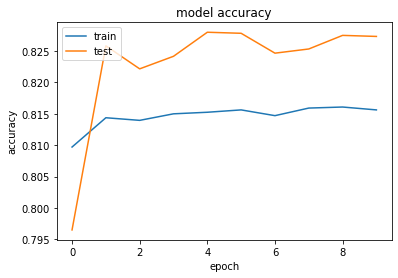

In [23]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

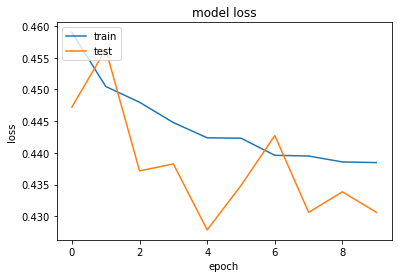

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

188/188 [==============================] - 0s 1ms/step


In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4490,  213],
       [ 823,  474]])

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8273333333333334

In [28]:
##get the weights
classifier.get_weights()

[array([[-0.04209494,  0.40663594, -0.6448452 , -2.132834  , -1.8140259 ,
         -2.1146913 ,  1.452775  , -1.3742721 ,  0.7930347 ,  1.0235326 ,
          0.88832724, -1.2165005 , -0.9405833 ,  0.09973659,  0.6107272 ,
         -0.17807522,  1.1676332 ,  0.2578915 ,  0.00958882, -0.81844646],
        [-0.10522773, -0.22897515, -0.22457659, -0.6670375 , -0.31461537,
          0.12335115,  2.1495614 ,  1.0533688 , -0.13786902,  0.5313828 ,
         -1.3449457 , -0.3008528 , -0.1885681 ,  0.44070405, -0.16566586,
         -1.0464135 ,  1.122401  ,  1.579252  , -0.6702634 , -0.6179258 ],
        [-0.65704995, -0.20957297,  2.0598056 , -0.08601402, -0.1742396 ,
         -0.1162921 , -1.1843671 , -0.07042021, -0.0908878 ,  2.6734583 ,
         -1.5096325 , -0.21873556, -0.7105037 , -0.23943019,  0.09485195,
          1.3772491 , -1.5490984 ,  0.39112598, -0.3024701 , -0.40899256],
        [ 0.09898803,  0.0100538 ,  1.1290812 , -0.42003846, -1.1987252 ,
          0.22674474,  0.2585441 , 

In [29]:
## Saving h5 file
classifier.save('model.h5')

In [30]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [76]:
classifier1.predict(X_test)

188/188 [==============================] - 0s 1ms/step


array([[0.56616765],
       [0.19080275],
       [0.31243336],
       ...,
       [0.12015577],
       [0.64996004],
       [0.14826621]], dtype=float32)

In [78]:
X_test

array([[-1.14095868, -1.22772676, -1.08001456, ..., -0.20863815,
        -0.3163186 , -0.25987201],
       [-1.14095868,  0.81451348,  0.18897347, ..., -0.3119826 ,
        -0.25038332, -0.296449  ],
       [ 0.48091719,  0.81451348, -1.08001456, ..., -0.3119826 ,
        -0.3163186 , -0.296449  ],
       ...,
       [-0.67756558, -1.22772676,  1.45796149, ..., -0.21509718,
        -0.30721953, -0.293098  ],
       [-1.14095868, -1.22772676,  0.18897347, ..., -0.3119826 ,
        -0.18444804, -0.296449  ],
       [-0.90926213, -1.22772676,  0.18897347, ...,  0.02840818,
        -0.13077673, -0.12100443]])

In [34]:
dict_value={
"LIMIT_BAL" : 20000 ,
"SEX"       : 2     ,
"EDUCATION" : 2     ,
"MARRIAGE"  : 1     ,
"AGE"       : 24    ,
"PAY_0"     : 2     ,
"PAY_2"     : 2     ,
"PAY_3"     : -1    ,
"PAY_4"     : -1    ,
"PAY_5"     : -2    ,
"PAY_6"     : -2    ,
"BILL_AMT1" : 3913  ,
"BILL_AMT2" : 3102  ,
"BILL_AMT3" : 689   ,
"BILL_AMT4" : 0     ,
"BILL_AMT5" : 0     ,
"BILL_AMT6" : 0     ,
"PAY_AMT1"  : 0     ,
"PAY_AMT2"  : 689   ,
"PAY_AMT3"  : 0     ,
"PAY_AMT4"  : 0     ,
"PAY_AMT5"  : 0     ,
"PAY_AMT6"  : 0
}

In [62]:
#dict_value

In [67]:
# row no 3 in csv file (dependent value is 0 in csv)
datas=[90000 ,
2     ,
2     ,
2     ,
34    ,
0     ,
0     ,
0     ,
0     ,
0     ,
0     ,
29239 ,
14027 ,
13559 ,
14331 ,
14948 ,
15549 ,
1518  ,
1500  ,
1000  ,
1000  ,
1000  ,
5000]

In [68]:
classifier.predict([datas])[0]

1/1 [==============================] - 0s 27ms/step


array([0.15074062], dtype=float32)

In [69]:
# row no 14 in csv file  (dependent value is 1 in csv)
datas2=[70000  ,
1      ,
2      ,
2      ,
30     ,
1      ,
2      ,
2      ,
0      ,
0      ,
2      ,
65802  ,
67369  ,
65701  ,
66782  ,
36137  ,
36894  ,
3200   ,
0      ,
3000   ,
3000   ,
1500   ,
0]

In [70]:
classifier.predict([datas2])[0]

1/1 [==============================] - 0s 26ms/step


array([0.15074062], dtype=float32)